# Regularization

In [1]:
#getting dataset

from sklearn.datasets import fetch_california_housing

data = fetch_california_housing()

X = data['data']
y = data['target']


In [3]:
#checking the data
y

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

In [4]:
#dividing data into train/test

from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

X_train, X_test, y_train, y_test = train_test_split(*shuffle(X,y), test_size=0.3)

C:\ProgramData\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [8]:
#scaling

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

In [9]:
#importing the estimator

from sklearn.linear_model import Ridge, Lasso
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()

linreg.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [24]:
#getting behind regularization, NOW!

import numpy as np
from sklearn.metrics import r2_score


alphas = np.logspace(-2,2,100)

ridge_coef = []
lasso_coef = []

ridge_score = []
lasso_score = []

for alpha in alphas:
    ridge_reg = Ridge(alpha = alpha).fit(X_train, y_train)
    lasso_reg = Lasso(alpha=alpha).fit(X_train, y_train)
    
    ridge_coef.append(ridge_reg.coef_)
    lasso_coef.append(lasso_reg.coef_)
    
    ridge_score.append(r2_score(y_test, ridge_reg.predict(X_test)))
    lasso_score.append(r2_score(y_test, lasso_reg.predict(X_test)))
    
    
linreg_score = r2_score(y_test, linreg.predict(X_test))



In [25]:
print('Linear Regression score: %.2f'%linreg_score)
print('Ridge Regression score: %.2f '%max(ridge_score))
print('Lasso Regression score: %.2f'%max(lasso_score))

Linear Regression score: -4150.74
Ridge Regression score: -3910.02 
Lasso Regression score: 0.10


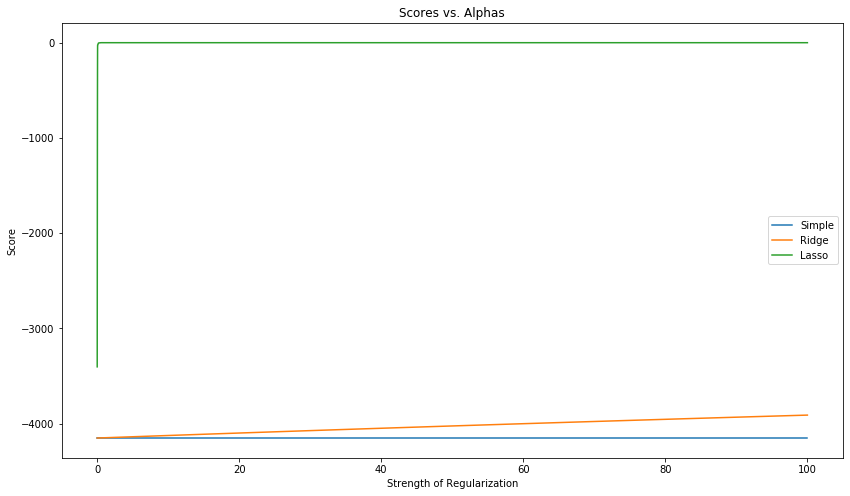

In [23]:
#plotting results

import matplotlib.pyplot as plt

plt.figure(figsize=[14,8])
plt.plot(alphas, np.repeat(linreg_score, len(alphas)), label='Simple')
plt.plot(alphas, ridge_score, label = 'Ridge')
plt.plot(alphas, lasso_score, label = 'Lasso')
plt.title('Scores vs. Alphas')
plt.xlabel('Strength of Regularization')
plt.ylabel('Score')
plt.legend();